In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('/Users/maheshg/Dropbox/Sample Datasets Kaggle/Google_Daily_News.csv')

In [14]:
data.head()

,category,datetime,headline,id,image,related,source,summary,url
0,company,1745449200,"Alphabet earnings, Fed comments, Nintendo Swit...",134059226,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Here's what investors are watching on Thursday...,https://finnhub.io/api/news?id=5381fda0f641074...
1,company,1745446095,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,134059227,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 10 Best Stocks...,https://finnhub.io/api/news?id=bdc5b5103ae73db...
2,company,1745442355,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,134059228,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 20 Best Stocks...,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...
3,company,1745440328,Google earnings are coming today. Here's what ...,134059229,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Google (GOOGL) will report first-quarter 2025 ...,https://finnhub.io/api/news?id=ed468a233b607bd...
4,company,1745439372,Equity Markets Close Higher Over Potential Red...,134059230,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,US benchmark equity indexes closed higher on W...,https://finnhub.io/api/news?id=54bdad840d13d87...


In [15]:
data_cleaned = data.dropna()

In [16]:
data_cleaned.isna().sum()

category    0
datetime    0
headline    0
id          0
image       0
related     0
source      0
summary     0
url         0
dtype: int64

In [17]:
print(data_cleaned.head())

  category    datetime                                           headline  \
0  company  1745449200  Alphabet earnings, Fed comments, Nintendo Swit...   
1  company  1745446095  Is Alphabet Inc. (GOOGL) the Best Stock to Buy...   
2  company  1745442355  Is Alphabet Inc. (GOOG) the Best Stock to Buy ...   
3  company  1745440328  Google earnings are coming today. Here's what ...   
4  company  1745439372  Equity Markets Close Higher Over Potential Red...   

          id                                              image related  \
0  134059226  https://s.yimg.com/rz/stage/p/yahoo_finance_en...   GOOGL   
1  134059227  https://s.yimg.com/rz/stage/p/yahoo_finance_en...   GOOGL   
2  134059228  https://s.yimg.com/rz/stage/p/yahoo_finance_en...   GOOGL   
3  134059229  https://s.yimg.com/rz/stage/p/yahoo_finance_en...   GOOGL   
4  134059230  https://s.yimg.com/rz/stage/p/yahoo_finance_en...   GOOGL   

  source                                            summary  \
0  Yahoo  Here's what i

In [38]:
data_cleaned['date_ddmmyyyy'] = pd.to_datetime(data_cleaned['datetime'], unit='s').dt.strftime('%d%m%Y')
print(data_cleaned[['datetime', 'date_ddmmyyyy']].head())

     datetime date_ddmmyyyy
0  1745449200      23042025
1  1745446095      23042025
2  1745442355      23042025
3  1745440328      23042025
4  1745439372      23042025


In [19]:
data_cleaned.head()

,category,datetime,headline,id,image,related,source,summary,url,date_ddmmyyyy
0,company,1745449200,"Alphabet earnings, Fed comments, Nintendo Swit...",134059226,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Here's what investors are watching on Thursday...,https://finnhub.io/api/news?id=5381fda0f641074...,23042025
1,company,1745446095,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,134059227,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 10 Best Stocks...,https://finnhub.io/api/news?id=bdc5b5103ae73db...,23042025
2,company,1745442355,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,134059228,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 20 Best Stocks...,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...,23042025
3,company,1745440328,Google earnings are coming today. Here's what ...,134059229,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Google (GOOGL) will report first-quarter 2025 ...,https://finnhub.io/api/news?id=ed468a233b607bd...,23042025
4,company,1745439372,Equity Markets Close Higher Over Potential Red...,134059230,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,US benchmark equity indexes closed higher on W...,https://finnhub.io/api/news?id=54bdad840d13d87...,23042025


In [20]:
data_cleaned.columns

Index(['category', 'datetime', 'headline', 'id', 'image', 'related', 'source',
       'summary', 'url', 'date_ddmmyyyy'],
      dtype='object')

In [21]:
data_cleaned = data_cleaned.drop(columns=['id','image','related'])

In [22]:
# Change the order of columns in data_cleaned using iloc
# For example, to move 'date_ddmmyyyy' to the first column:
data_cleaned = data_cleaned.iloc[:, [5, 0, 1, 2, 3, 4]]
data_cleaned.head()

,url,category,datetime,headline,source,summary
0,https://finnhub.io/api/news?id=5381fda0f641074...,company,1745449200,"Alphabet earnings, Fed comments, Nintendo Swit...",Yahoo,Here's what investors are watching on Thursday...
1,https://finnhub.io/api/news?id=bdc5b5103ae73db...,company,1745446095,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,Yahoo,We recently published a list of 10 Best Stocks...
2,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...,company,1745442355,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,Yahoo,We recently published a list of 20 Best Stocks...
3,https://finnhub.io/api/news?id=ed468a233b607bd...,company,1745440328,Google earnings are coming today. Here's what ...,Yahoo,Google (GOOGL) will report first-quarter 2025 ...
4,https://finnhub.io/api/news?id=54bdad840d13d87...,company,1745439372,Equity Markets Close Higher Over Potential Red...,Yahoo,US benchmark equity indexes closed higher on W...


In [23]:
data_cleaned.head()

,url,category,datetime,headline,source,summary
0,https://finnhub.io/api/news?id=5381fda0f641074...,company,1745449200,"Alphabet earnings, Fed comments, Nintendo Swit...",Yahoo,Here's what investors are watching on Thursday...
1,https://finnhub.io/api/news?id=bdc5b5103ae73db...,company,1745446095,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,Yahoo,We recently published a list of 10 Best Stocks...
2,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...,company,1745442355,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,Yahoo,We recently published a list of 20 Best Stocks...
3,https://finnhub.io/api/news?id=ed468a233b607bd...,company,1745440328,Google earnings are coming today. Here's what ...,Yahoo,Google (GOOGL) will report first-quarter 2025 ...
4,https://finnhub.io/api/news?id=54bdad840d13d87...,company,1745439372,Equity Markets Close Higher Over Potential Red...,Yahoo,US benchmark equity indexes closed higher on W...


In [24]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/maheshg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
%pip install wordcloud
from wordcloud import WordCloud
import re

Note: you may need to restart the kernel to use updated packages.


In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [28]:
%pip install --upgrade scikit-plot
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve

Note: you may need to restart the kernel to use updated packages.


In [39]:
data_cleaned.head()

,url,category,datetime,headline,source,summary,date_ddmmyyyy
0,https://finnhub.io/api/news?id=5381fda0f641074...,company,1745449200,"Alphabet earnings, Fed comments, Nintendo Swit...",Yahoo,Here's what investors are watching on Thursday...,23042025
1,https://finnhub.io/api/news?id=bdc5b5103ae73db...,company,1745446095,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,Yahoo,We recently published a list of 10 Best Stocks...,23042025
2,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...,company,1745442355,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,Yahoo,We recently published a list of 20 Best Stocks...,23042025
3,https://finnhub.io/api/news?id=ed468a233b607bd...,company,1745440328,Google earnings are coming today. Here's what ...,Yahoo,Google (GOOGL) will report first-quarter 2025 ...,23042025
4,https://finnhub.io/api/news?id=54bdad840d13d87...,company,1745439372,Equity Markets Close Higher Over Potential Red...,Yahoo,US benchmark equity indexes closed higher on W...,23042025


In [40]:
data_cleaned.head()

,url,category,datetime,headline,source,summary,date_ddmmyyyy
0,https://finnhub.io/api/news?id=5381fda0f641074...,company,1745449200,"Alphabet earnings, Fed comments, Nintendo Swit...",Yahoo,Here's what investors are watching on Thursday...,23042025
1,https://finnhub.io/api/news?id=bdc5b5103ae73db...,company,1745446095,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,Yahoo,We recently published a list of 10 Best Stocks...,23042025
2,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...,company,1745442355,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,Yahoo,We recently published a list of 20 Best Stocks...,23042025
3,https://finnhub.io/api/news?id=ed468a233b607bd...,company,1745440328,Google earnings are coming today. Here's what ...,Yahoo,Google (GOOGL) will report first-quarter 2025 ...,23042025
4,https://finnhub.io/api/news?id=54bdad840d13d87...,company,1745439372,Equity Markets Close Higher Over Potential Red...,Yahoo,US benchmark equity indexes closed higher on W...,23042025


/var/folders/bt/k7t4mr2j6kq79jv3vbj756z80000gn/T/ipykernel_18417/2095498625.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data_cleaned['headline'], palette='Set2')


<Axes: xlabel='count', ylabel='headline'>

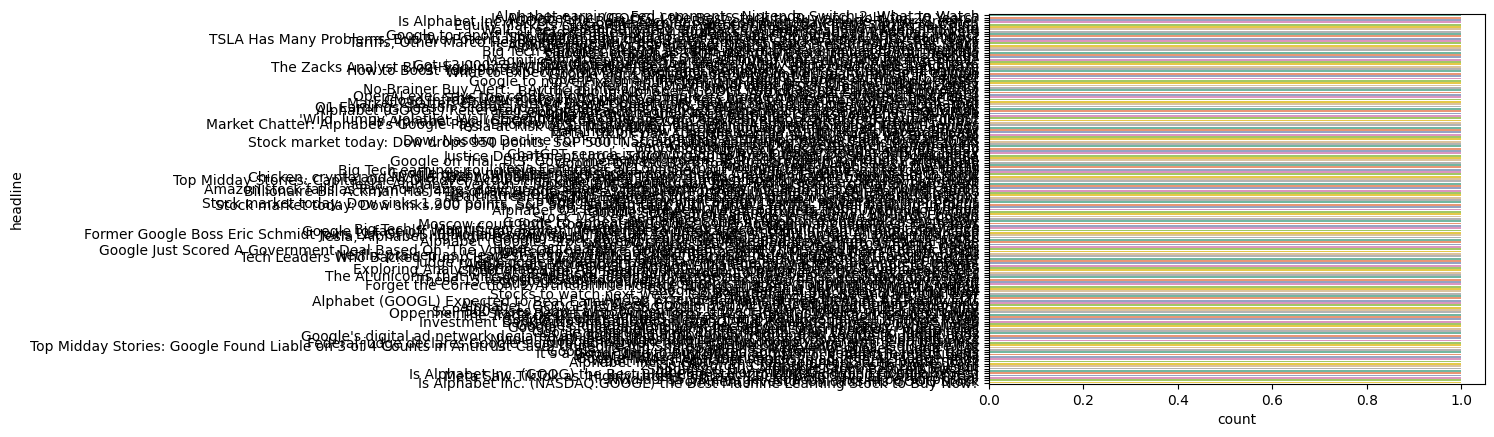

In [46]:
sns.countplot(data = data_cleaned['headline'], palette='Set2')